##**IRIS FLOWER CLASSIFICATION**
The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.

Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.

<img src="https://miro.medium.com/v2/resize:fit:1000/0*VucNhXeY_YFMwHOZ"/>



###**Import Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

###**Loading Data & exploration**

In [ ]:
flower_df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv")
flower_df.info()
flower_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


###**Data Pre-processing**

####*Checking* For Outliers



<Axes: >

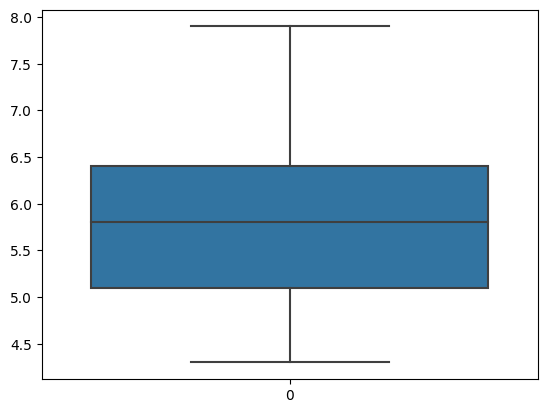

In [ ]:
sns.boxplot(flower_df['sepal_length'])

<Axes: >

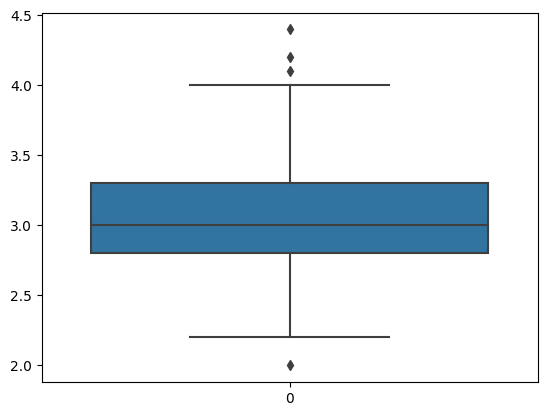

In [ ]:
sns.boxplot(flower_df['sepal_width'])


<Axes: >

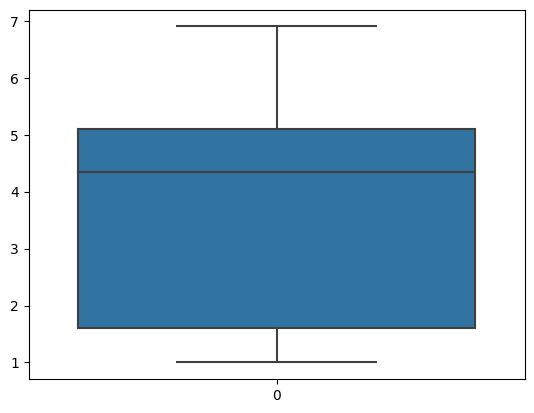

In [ ]:
sns.boxplot(flower_df['petal_length'])

<Axes: >

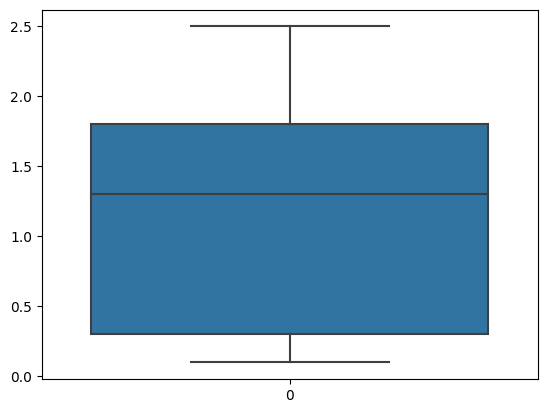

In [ ]:
sns.boxplot(flower_df['petal_width'])

### Handling Outiers using IQR Method

In [ ]:
pd.Series(flower_df.sepal_width)
Quat1 = flower_df.sepal_width.quantile(0.25)
Quat3 = flower_df.sepal_width.quantile(0.75)
IQR = Quat3 - Quat1
lower_boundary = Quat1 - 1.5 * IQR
upper_boundary = Quat3 + 1.5 * IQR
outliers = flower_df[(flower_df['sepal_width'] < lower_boundary) | (flower_df['sepal_width'] > upper_boundary)].index
clean_data = flower_df.drop(outliers)
clean_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Verifying no Outliers

<Axes: >

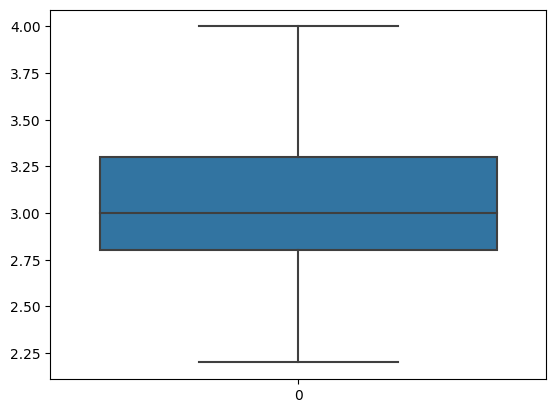

In [ ]:
sns.boxplot(clean_data['sepal_width'])

####Training and Testing data preparation

In [ ]:
x_values = clean_data.drop('species', axis=1)
y_values = clean_data['species']
print(x_values)
y_values

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[146 rows x 4 columns]


0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 146, dtype: object

####Spliting data into train and test data

In [ ]:
#LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.3, random_state=6)

###**Model Training**

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

###**Testing Model**

In [ ]:
x_predecition_result = model.predict(x_test)
print(x_predecition_result)
print("Accuracy Score is: ", accuracy_score(x_predecition_result, y_test))

['Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica']
Accuracy Score is:  1.0
